# Regression Models using Default Parameters (Ames, Iowa Housing)

### Lodaing, Splitting and Scaling the data

In [1]:
cd ..

/home/jovyan/04-Final


In [2]:
run __init__.py

In [3]:
%run src/load_data.py

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Distribution of the target after splitting into Train/Test looks good (80/20)

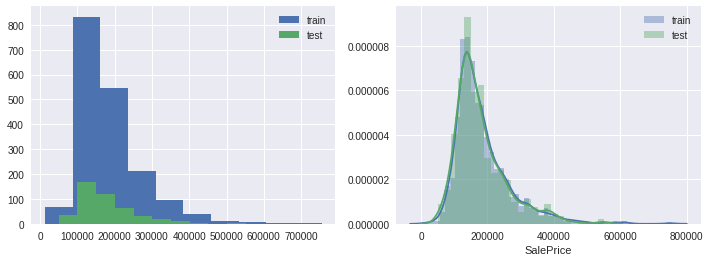

In [5]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.hist(ames_train_labels, label='train')
plt.hist(ames_test_labels, label='test')
plt.legend()
fig.add_subplot(1,2,2)
sns.distplot(ames_train_labels, label='train')
sns.distplot(ames_test_labels, label='test')
plt.legend()

In [6]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [7]:
train_data =  data['ames']['train']['engineered']
train_labels = data['ames']['train']['labels']
test_data =  data['ames']['test']['engineered']
test_labels = data['ames']['test']['labels']

### Using the following models with default parameters to fit the data

In [8]:
models = {
    'Ridge' : linear_model.Ridge(),
    'Lasso' : linear_model.Lasso(),
    'K Nearest Neighbors' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Support Vector Machines - RBF' : SVR(),
    'Support Vector Machines - Linear' : SVR(kernel ='linear')
}

In [9]:
def run_model(model_name, X_train, y_train, X_test, y_test):
    model = models[model_name]
    model.fit(X_train , y_train)
    return {
        'model_name' : model_name,
        'model_train_score' : model.score(X_train, y_train),
        'model_test_score' : model.score(X_test, y_test)
    }

In [10]:
results = []
for model_name in models.keys():
    results.append(run_model(model_name, train_data, train_labels, test_data, test_labels))

### $R^2$ scores for the models

In [11]:
results_df = pd.DataFrame(results)
results_df

,model_name,model_test_score,model_train_score
0,Ridge,0.838308,0.947164
1,Lasso,0.821542,0.956518
2,K Nearest Neighbors,0.785377,0.891439
3,Decision Tree,0.649644,0.999999
4,Support Vector Machines - RBF,-0.047611,-0.070468
5,Support Vector Machines - Linear,0.065991,0.038319


### Observation

Here are some notes on the models used above.

    Ridge regression is a more robust version of linear regression, putting constrainsts on regression coefficients to make them much more natural, less subject to over-fitting, and easier to interpret.
    
    Lasso regression is similar to ridge regression, but automatically performs variable reduction.
    
    The basic idea of kNN is to compute the distance between the target data and the training samples and to only use the information of a certain number (k) of the nearest neighbors of the target data to make a decision. In regression, the target data will be assigned as the average of the values of the k nearest neighbors. Unlike Linear Regression kNN can deal with nonlinearity, but kNN cannot determine which predictors are important or interpret the resulting predictors.
    
    In a regression tree the idea is this: since the target variable does not have classes, we fit a regression model to the target variable using each of the independent variables. Then for each independent variable, the data is split at several split points. At each split point, the "error" between the predicted value and the actual values is squared to get a "Sum of Squared Errors (SSE)". The split point errors across the variables are compared and the variable/point yielding the lowest SSE is chosen as the root node/split point. This process is recursively continued.
    
    Support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. The model produced by SVR depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

From the scores above we can see that the linear models produced the best results. Rather than using basic linear regression, we used the Ridge and Lasso models with regularization to achieve better results. Furthermore, with the SVR model, the results improved when we chose the linear algorithm. This indicates that there is a linear relationship between our variables and the target of sale price.

The decision tree model performed well with the train data, but is did not perform as well with the test data set. This could possibly improve with more data points, or using an enhanced tree model.

In the next section we will adjust the hyper-parameters to improve the models.